In [158]:
from numba.cuda.libdevice import fmax
%matplotlib inline
from scipy import signal
from scipy.io import wavfile
import scipy.integrate
import IPython.display as ipyd
import librosa
import librosa.display
import librosa.feature
import matplotlib.pyplot as plt
import numpy as np

In [159]:
minHz = 125
maxHz = 3000
stft_frame_len = 0.033
stft_frame_trans = 0.015
mels_amount = 13


# Comparison Files

In [160]:
def load_plot(path: str):
    #Load and display
    file_sample_rate, file_wav = wavfile.read(path)
    ipyd.display(ipyd.Audio(rate=file_sample_rate, data=file_wav))
    file_n = len(file_wav)

    #plot wav
    plt.figure(figsize=(4,2))
    plt.plot(np.linspace(0, file_n/file_sample_rate, file_n), file_wav)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()

    # FFT
    plt.figure(figsize=(4,2))
    file_fft = np.fft.fft(file_wav)[minHz:maxHz]
    file_fft_n = len(file_fft)
    plt.plot(np.linspace(0, file_sample_rate*(file_fft_n - 1)/file_fft_n, file_fft_n), np.abs(file_fft))
    plt.xlabel("Frequency")
    plt.ylabel("Amplitude")
    plt.show()
    return file_sample_rate, file_wav, file_n, file_fft

In [161]:
def spectrum_stft(wave, sample_rate):
    samples_frame = int(stft_frame_len * sample_rate)
    samples_transition = int(stft_frame_trans * sample_rate)
    wave = wave.astype(np.float32)

    # normalize
    wave /= np.max(np.abs(wave),axis=0)

    stft = librosa.stft(wave, n_fft=samples_frame, hop_length=samples_transition)
    fig, ax = plt.subplots(figsize=(4, 2))
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft)),
                             y_axis='hz',
                             x_axis='time',
                             ax=ax,
                             fmax = maxHz,
                             fmin = minHz )
    plt.show()

    mel_spectrum = librosa.feature.melspectrogram(
        y=wave, sr=sample_rate, n_mels=mels_amount,
        n_fft=samples_frame, hop_length=samples_transition
    )

    log_mel_spectrum = np.log(mel_spectrum)
    fig, ax = plt.subplots(figsize=(4, 2))
    print(log_mel_spectrum.shape)
    librosa.display.specshow(log_mel_spectrum,
                             y_axis='hz',
                             x_axis='time',
                             ax=ax,
                             fmax = maxHz,
                             fmin = minHz )
    plt.show()

    return mel_spectrum


In [162]:
def diff_fft(a: np.ndarray, b: np.ndarray, sample_rate: int) -> np.ndarray:

    # diff add
    plt.figure(figsize=(4,2))
    n = len(a)
    x = np.linspace(0, sample_rate*(n - 1)/n, n)
    curve = np.abs(np.abs(a)*4 - np.abs(b))
    plt.plot(x, curve)
    print(np.trapezoid(curve)/100000)

    plt.xlabel("Frequency")
    plt.ylabel("Difference")
    plt.show()

    plt.plot(x, np.abs(a))
    plt.plot(x, np.abs(b))

    idx = np.argwhere(np.diff(np.abs(a) - np.abs(b))).flatten()
    plt.plot(x[idx], np.abs(a)[idx], 'ro')

    plt.show()

    return idx


In [163]:
def cosine_dist(a: np.ndarray, b: np.ndarray):
    a = a.T
    b = b.T

    comp_len = min(len(a), len(b))

    distances = np.zeros(comp_len)
    for i in range(comp_len):
        distances[i] = scipy.spatial.distance.cosine(a[i], b[i])

    return np.sum(distances)


## Start

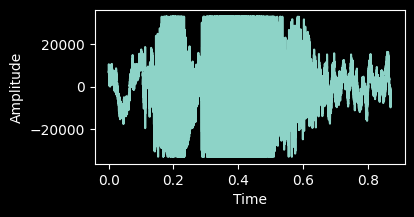

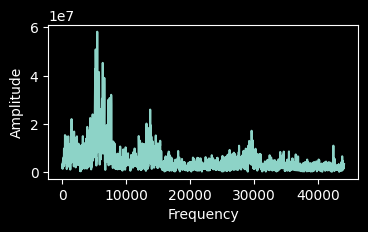

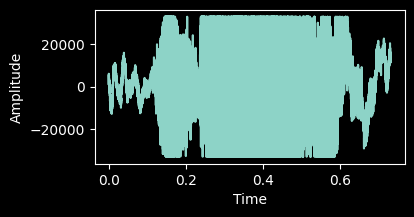

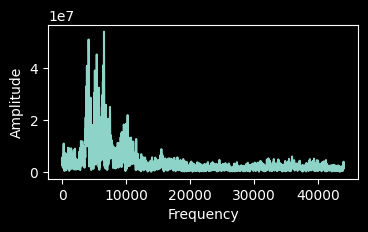

476279.1834743479


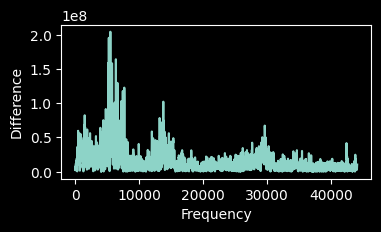

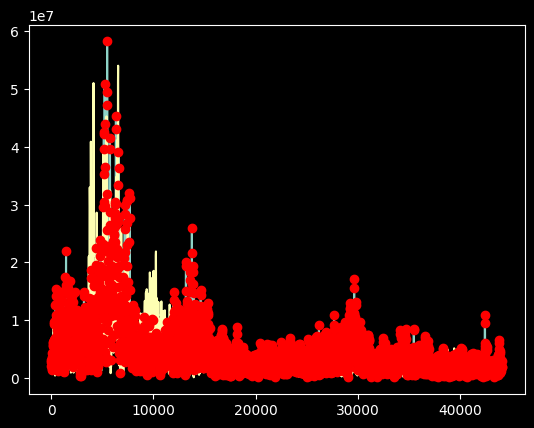

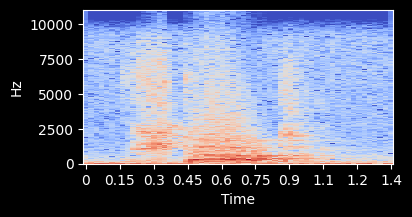

(13, 59)


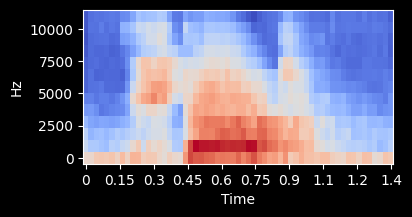

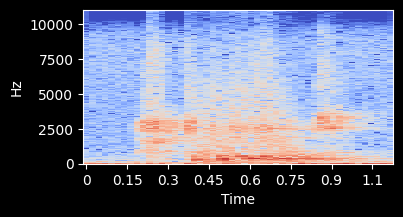

(13, 49)


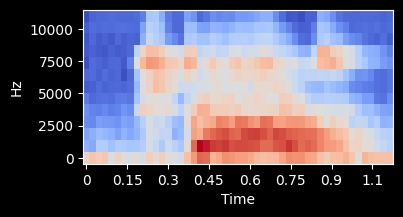

In [164]:
# Load
startFile_sample_rate, startFile_wav, startFile_n, startFile_fft = load_plot("./wav/start.wav")

# load mariusz start
startFileMariusz_sample_rate, startFileMariusz_wav, startFileMariusz_n, startFileMariusz_fft = load_plot("./wav/startMariusz.wav")

diff_fft(startFile_fft, startFileMariusz_fft, startFile_sample_rate)

startFile_mel = spectrum_stft(startFile_wav, startFile_sample_rate)
startFileMariusz_mel= spectrum_stft(startFileMariusz_wav, startFileMariusz_sample_rate)

## Stop

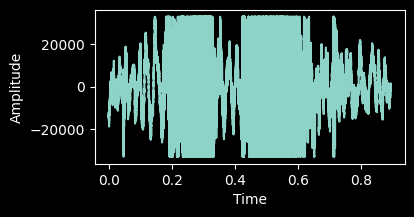

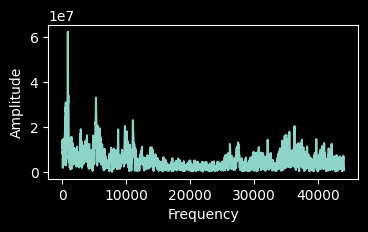

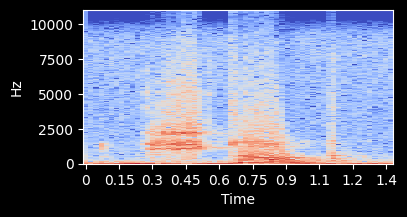

(13, 60)


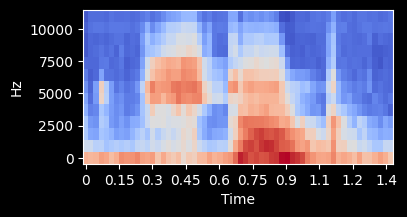

In [165]:
stopFile_sample_rate, stopFile_wav, stopFile_n, stopFile_fft = load_plot("./wav/stop.wav")

stopFile_mel = spectrum_stft(stopFile_wav, stopFile_sample_rate)

## Plus

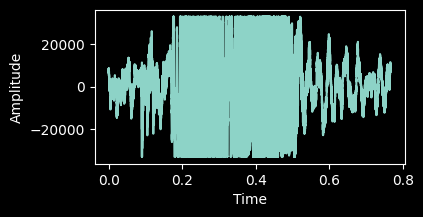

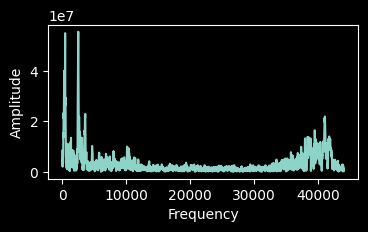

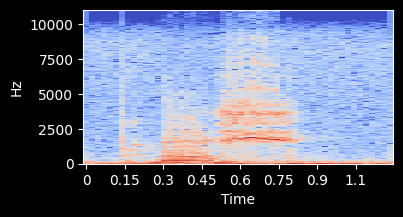

(13, 52)


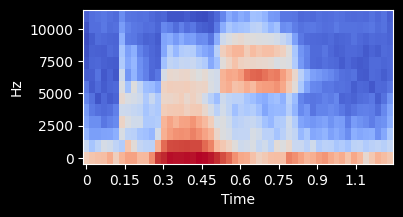

In [166]:
plusFile_sample_rate, plusFile_wav, plusFile_n, plusFile_fft = load_plot("./wav/plus.wav")

plusFile_mel = spectrum_stft(plusFile_wav, plusFile_sample_rate)


## Minus

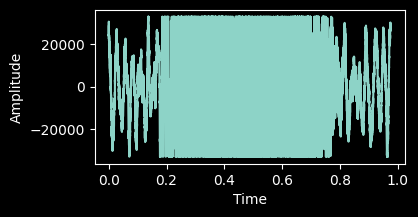

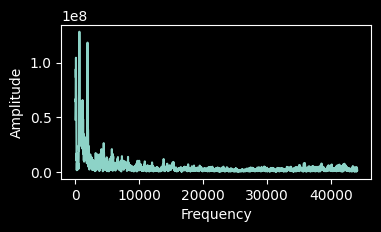

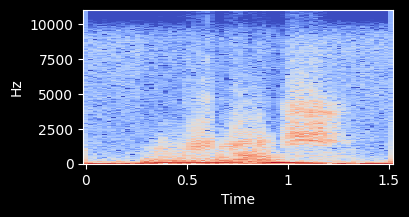

(13, 66)


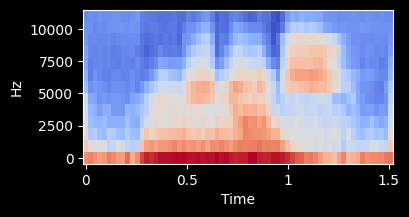

In [167]:
minusFile_sample_rate, minusFile_wav, minusFile_n, minusFile_fft = load_plot("./wav/minus.wav")

minusFile_mel = spectrum_stft(minusFile_wav, minusFile_sample_rate)


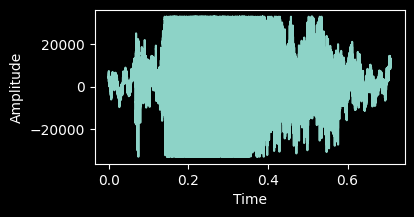

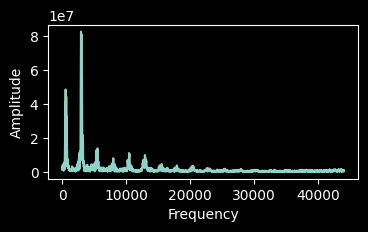

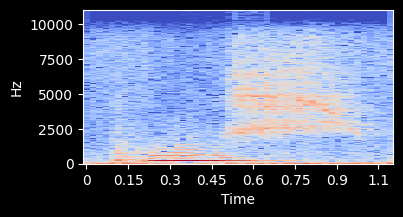

(13, 48)


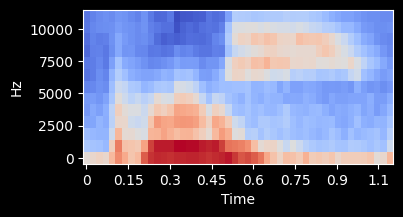

22.53509747982025
17.783544719219208
9.41470980644226
11.583027780056


In [172]:
compare_sample_rate, compare_wav, compare_n, compare_fft = load_plot("./wav/patiPlus.wav")
compare_mel = spectrum_stft(compare_wav, compare_sample_rate)

print(cosine_dist(compare_mel, startFile_mel))
print(cosine_dist(compare_mel, stopFile_mel))
print(cosine_dist(compare_mel, minusFile_mel))
print(cosine_dist(compare_mel, plusFile_mel))